### EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [16]:
df = pd.read_csv('240304 Training Assignment Dataset - Copy.csv')

In [17]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0
4,5,Female,29.0,NaN,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0
381105,381106,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0
381106,381107,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0
381107,381108,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0


In [18]:
df.shape

(381109, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                378700 non-null  object 
 2   Age                   378590 non-null  float64
 3   Driving_License       377925 non-null  float64
 4   Region_Code           377876 non-null  float64
 5   Previously_Insured    377901 non-null  float64
 6   Vehicle_Age           377651 non-null  object 
 7   Vehicle_Damage        377833 non-null  object 
 8   Annual_Premium        377943 non-null  float64
 9   Policy_Sales_Channel  379154 non-null  float64
 10  Vintage               381014 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 34.9+ MB


In [20]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,378590.00000,377925.000000,377876.000000,377901.000000,377943.000000,379154.000000,381014.000000,381109.000000
mean,190555.000000,38.81855,0.997867,26.393619,0.458178,30563.769928,112.040878,154.344021,0.122563
std,110016.836208,15.50903,0.046132,13.230413,0.498249,17216.943211,54.200731,83.672192,0.327936
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.00000,1.000000,15.000000,0.000000,24406.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.00000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.00000,1.000000,35.000000,1.000000,39397.000000,152.000000,227.000000,0.000000
max,381109.000000,85.00000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [21]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48746
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [22]:
df.isna().sum()

id                         0
Gender                  2409
Age                     2519
Driving_License         3184
Region_Code             3233
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Vintage                   95
Response                   0
dtype: int64

In [23]:
df.dtypes

id                        int64
Gender                   object
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                  int64
dtype: object

### univariate analysis

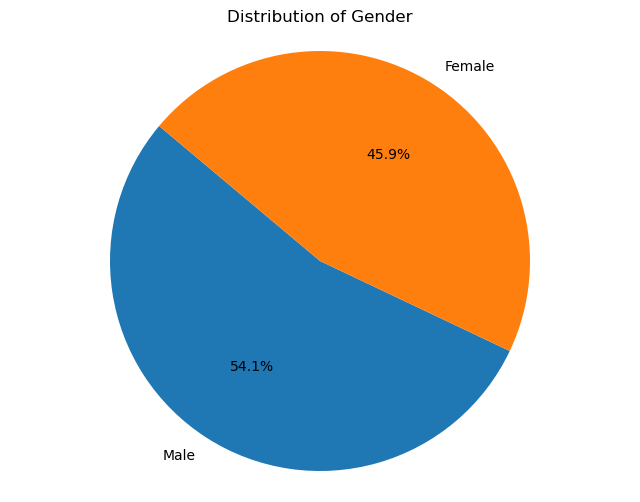

In [24]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

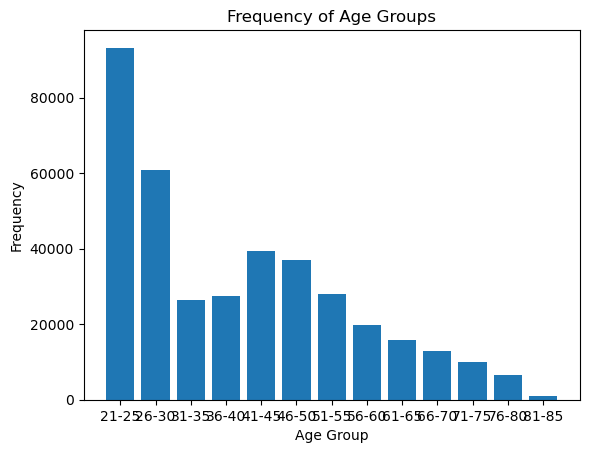

In [25]:
bin_edges = np.arange(20, 86, 5)  # Bin edges from 20 to 80 with a step of 10

frequencies, _ = np.histogram(df['Age'], bins=bin_edges)

plt.bar(range(len(frequencies)), frequencies, align='center', tick_label=[f'{edge+1}-{edge+5}' for edge in bin_edges[:-1]])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups')
plt.show()

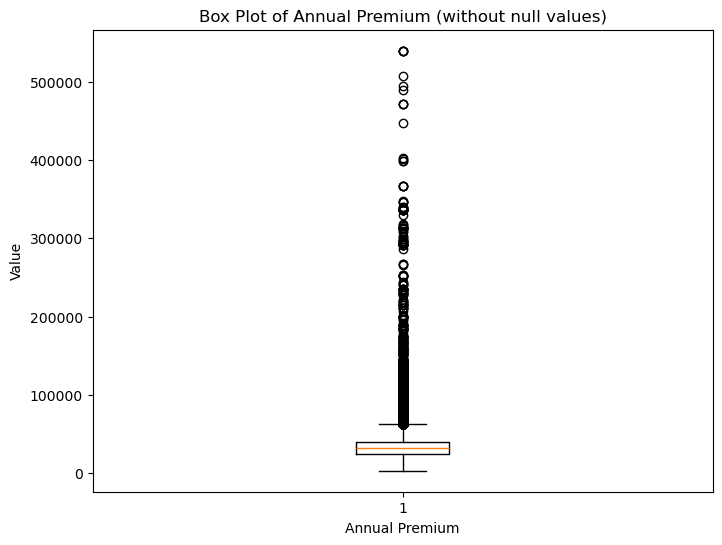

In [26]:
df_cleaned = df.dropna(subset=['Annual_Premium'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Annual_Premium'])
plt.xlabel('Annual Premium')
plt.ylabel('Value')
plt.title('Box Plot of Annual Premium (without null values)')
plt.show()

Response
0    334399
1     46710
Name: count, dtype: int64
[0.1, 0]


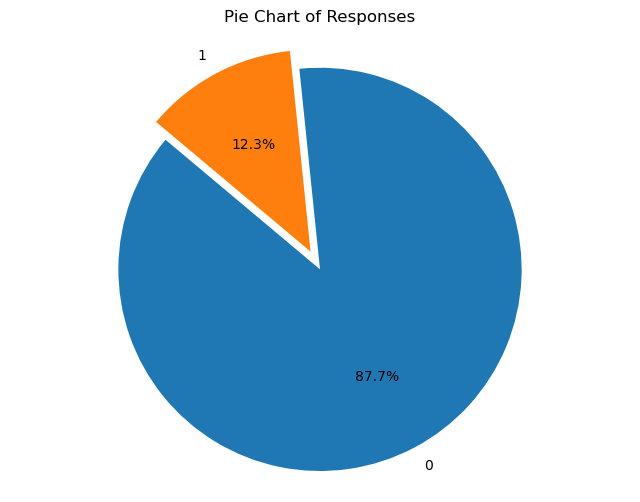

In [27]:
response_counts = df['Response'].value_counts()
print(response_counts)

explosions = [0.1 if count == response_counts.max() else 0 for count in response_counts]

print(explosions)
plt.figure(figsize=(8, 6))
plt.pie(response_counts, labels=response_counts.index, explode=explosions, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Responses')
plt.axis('equal')
plt.show()

Region_Code
28.0    105527
8.0      33590
46.0     19603
41.0     18127
15.0     13191
30.0     12095
29.0     10960
50.0     10162
11.0      9162
3.0       9157
36.0      8715
33.0      7590
47.0      7376
35.0      6869
6.0       6229
45.0      5561
37.0      5460
18.0      5098
48.0      4644
14.0      4641
39.0      4606
10.0      4337
Name: count, dtype: int64
[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\ArjunP\AppData\Local\Temp\ipykernel_6392\660013483.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  response_counts = df['Region_Code'].value_counts()[:10]


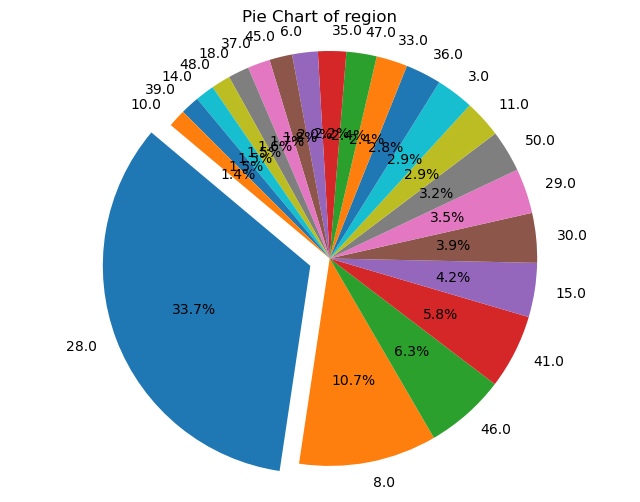

In [28]:


response_counts = df['Region_Code'].value_counts()[:10]
print(response_counts)

explosions = [0.1 if count == response_counts.max() else 0 for count in response_counts]

print(explosions)
plt.figure(figsize=(8, 6))
plt.pie(response_counts, labels=response_counts.index, explode=explosions, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of region')
plt.axis('equal')
plt.show()

### Bivariate analysis

In [29]:
cross_tab = pd.crosstab(df['Gender'], df['Vehicle_Damage'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

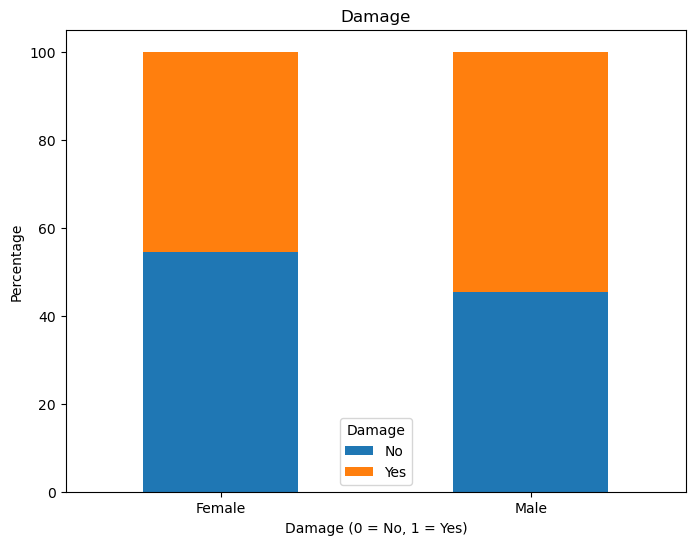

In [30]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Damage')
plt.xlabel('Damage (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Damage')
plt.show()

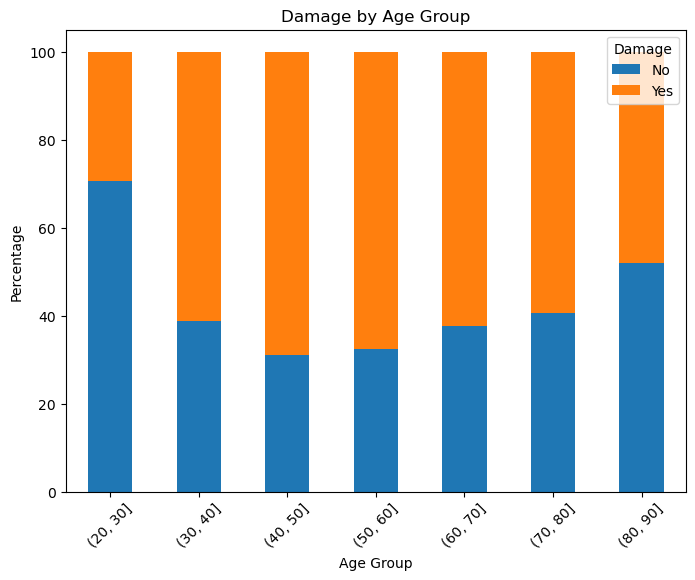

In [31]:
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Create cross-tabulation
cross_tab = pd.crosstab(age_bins, df['Vehicle_Damage'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Damage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Damage')
plt.show()

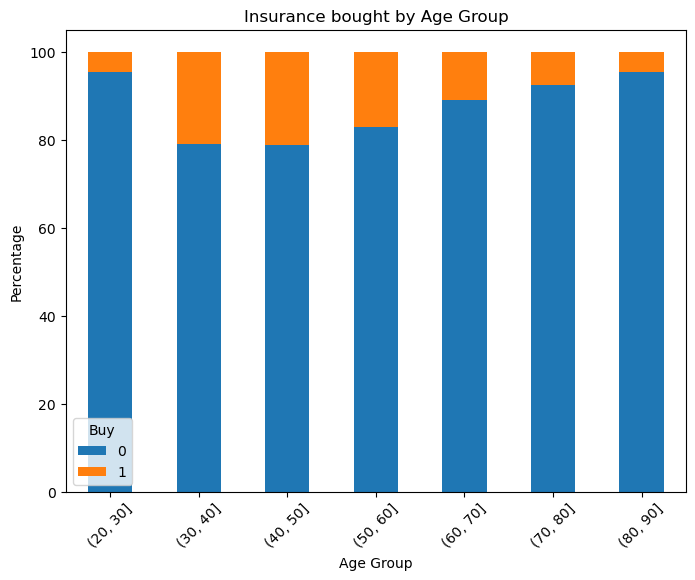

In [32]:
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Create cross-tabulation
cross_tab = pd.crosstab(age_bins, df['Response'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Insurance bought by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Buy')
plt.show()

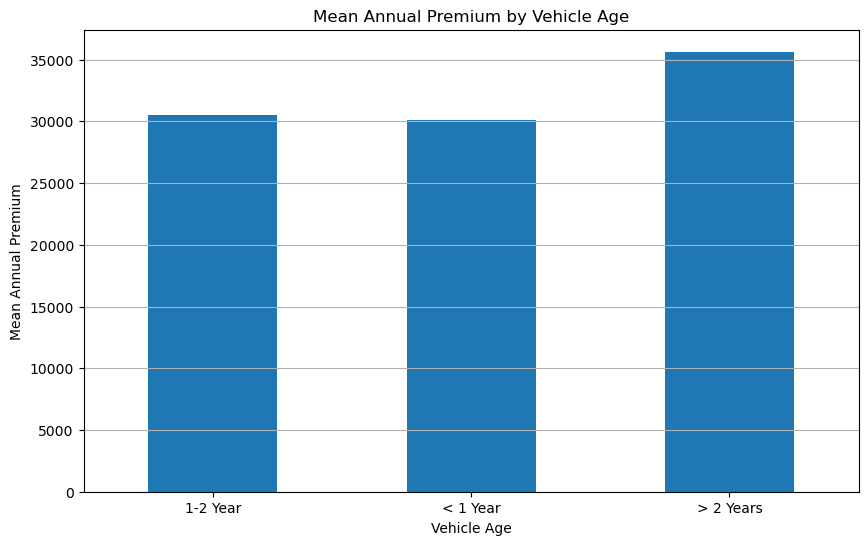

In [33]:
mean_premium_by_age = df.groupby('Vehicle_Age')['Annual_Premium'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_premium_by_age.plot(kind='bar')
plt.title('Mean Annual Premium by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Mean Annual Premium')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Response                 0      1
Previously_Insured               
0.0                 158610  46145
1.0                 172988    158


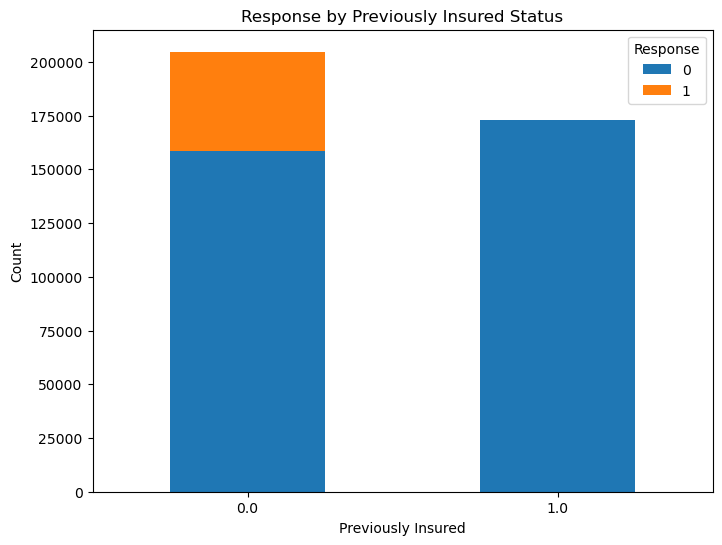

In [34]:
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])
print(contingency_table)
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Response by Previously Insured Status')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response')
plt.show()

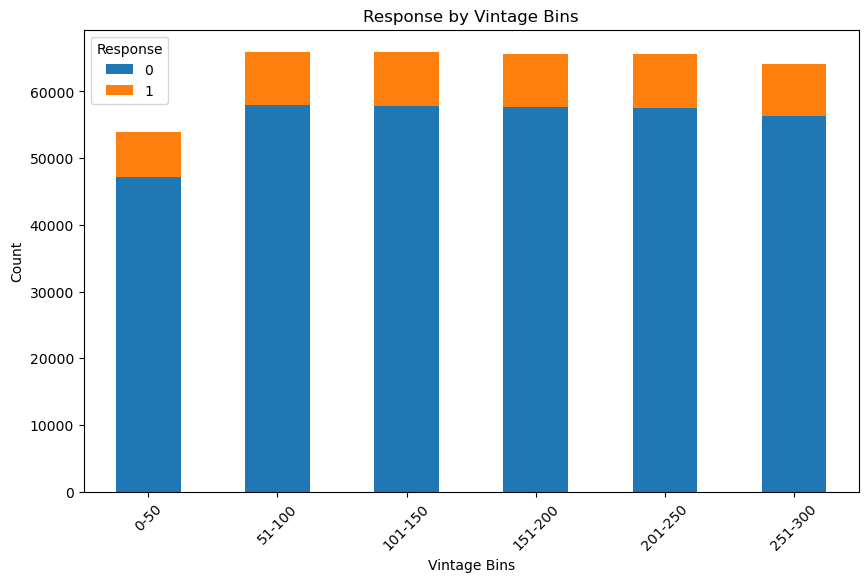

In [35]:
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

df['Vintage_bins'] = pd.cut(df['Vintage'], bins=bin_edges, labels=['0-50', '51-100', '101-150', '151-200', 
                                                                    '201-250', '251-300', '301-350', '351-400',
                                                                    '401-450', '451-500'])


contingency_table = pd.crosstab(df['Vintage_bins'], df['Response'])

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Vintage Bins')
plt.xlabel('Vintage Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()

In [36]:
top_bins = df['Policy_Sales_Channel'].value_counts()
print(top_bins)

Policy_Sales_Channel
152.0    134108
26.0      79286
124.0     73608
160.0     21675
156.0     10615
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64


Index([152.0, 26.0, 124.0, 160.0, 156.0, 122.0, 157.0, 154.0, 151.0, 163.0], dtype='float64', name='Policy_Sales_Channel')


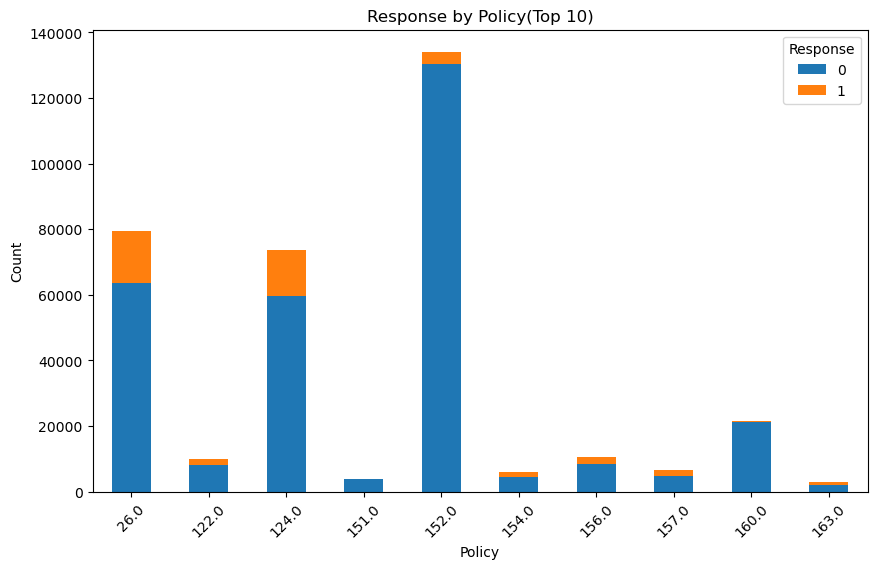

In [37]:
top_bins = df['Policy_Sales_Channel'].value_counts().head(10).index

print(top_bins)
df_top_bins = df[df['Policy_Sales_Channel'].isin(top_bins)]
contingency_table = pd.crosstab(df_top_bins['Policy_Sales_Channel'], df_top_bins['Response'])

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Policy(Top 10)')
plt.xlabel('Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()

### Multivaritte analasis

Response                                0      1
Previously_Insured Vehicle_Damage               
0.0                No               22888    900
                   Yes             135575  45205
1.0                No              163090     72
                   Yes               9744     86


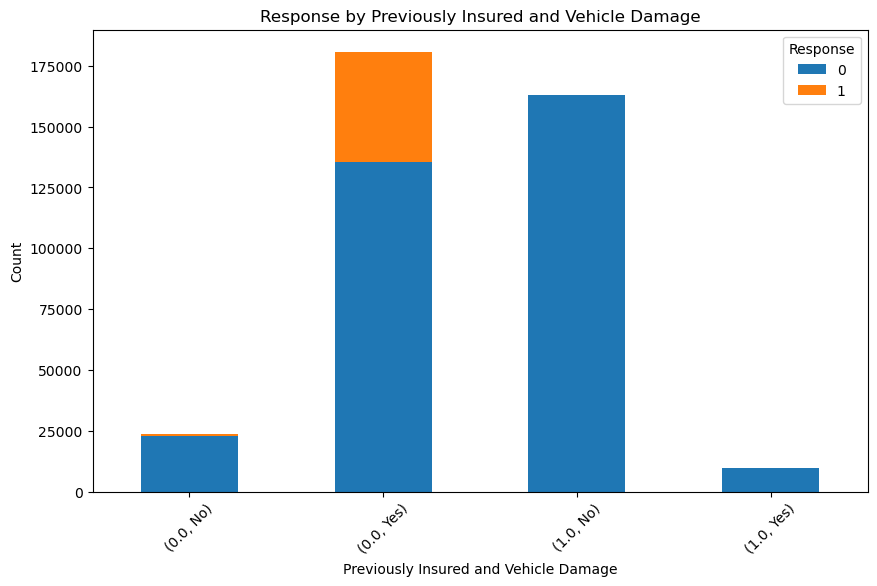

In [38]:
contingency_table = pd.crosstab(index=[df['Previously_Insured'], df['Vehicle_Damage']], columns=df['Response'])

print(contingency_table)

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Previously Insured and Vehicle Damage')
plt.xlabel('Previously Insured and Vehicle Damage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()

In [39]:
cleanup = {
    "Gender" : {"Male":0,"Female":1},
    "Vehicle_Age":{"> 2 Years":0,"1-2 Year":1,"< 1 Year":2},
    "Vehicle_Damage":{"No":0,"Yes":1}
}

df = df.replace(cleanup)

In [40]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

ValueError: could not convert string to float: '201-250'

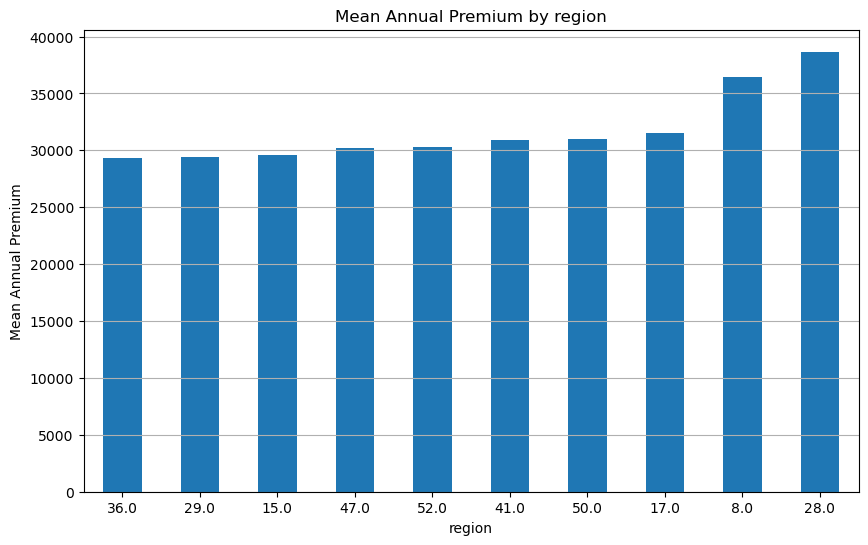

In [42]:
avg_premium_per_region = df.groupby('Region_Code')['Annual_Premium'].mean().sort_values().tail(10)
avg_premium_per_region

plt.figure(figsize=(10, 6))
avg_premium_per_region.plot(kind='bar')
plt.title('Mean Annual Premium by region')
plt.xlabel('region')
plt.ylabel('Mean Annual Premium')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [43]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_bins
0,1,0.0,44.0,1.0,28.0,0.0,0.0,1.0,40454.0,26.0,217.0,1,201-250
1,2,0.0,76.0,1.0,3.0,0.0,1.0,0.0,33536.0,26.0,183.0,0,151-200
2,3,0.0,47.0,1.0,28.0,0.0,0.0,1.0,38294.0,26.0,27.0,1,0-50
3,4,0.0,21.0,1.0,11.0,1.0,2.0,0.0,28619.0,152.0,203.0,0,201-250
4,5,1.0,29.0,NaN,41.0,1.0,2.0,0.0,27496.0,152.0,39.0,0,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0.0,74.0,1.0,26.0,1.0,1.0,0.0,30170.0,26.0,88.0,0,51-100
381105,381106,0.0,30.0,1.0,37.0,1.0,2.0,0.0,40016.0,152.0,131.0,0,101-150
381106,381107,0.0,21.0,1.0,30.0,1.0,2.0,0.0,35118.0,160.0,161.0,0,151-200
381107,381108,1.0,68.0,1.0,14.0,0.0,0.0,1.0,44617.0,124.0,74.0,0,51-100


In [44]:
columns = df.columns.tolist()
columns.remove('id')
columns.remove('Response')

In [45]:
from scipy.stats.stats import pearsonr
final_pearson_corr = {}

for feature in columns:
    df_cleaned = df.dropna(subset=[feature])
    final_pearson_corr[feature] = pearsonr(df_cleaned[feature].tolist(), df_cleaned['Response'].tolist())[0]


print(final_pearson_corr)

variables = list(final_pearson_corr.keys())
correlation_values = list(final_pearson_corr.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(variables, correlation_values)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Variables and Annual Premium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()


C:\Users\ArjunP\AppData\Local\Temp\ipykernel_6392\3199210292.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


TypeError: unsupported operand type(s) for +: 'float' and 'numpy.str_'

### Feature engineering

array([[<Axes: title={'center': 'Response'}>]], dtype=object)

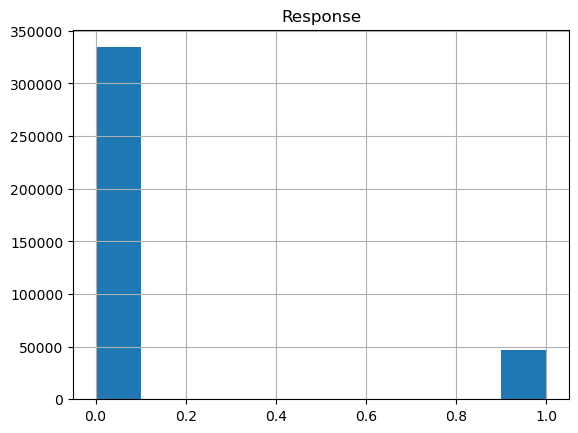

In [ ]:
df.hist(column="Response")

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_bins
0,1,0.0,44.0,1.0,28.0,0.0,0.0,1.0,40454.0,26.0,217.0,1,201-250
1,2,0.0,76.0,1.0,3.0,0.0,1.0,0.0,33536.0,26.0,183.0,0,151-200
2,3,0.0,47.0,1.0,28.0,0.0,0.0,1.0,38294.0,26.0,27.0,1,0-50
3,4,0.0,21.0,1.0,11.0,1.0,2.0,0.0,28619.0,152.0,203.0,0,201-250
4,5,1.0,29.0,NaN,41.0,1.0,2.0,0.0,27496.0,152.0,39.0,0,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0.0,74.0,1.0,26.0,1.0,1.0,0.0,30170.0,26.0,88.0,0,51-100
381105,381106,0.0,30.0,1.0,37.0,1.0,2.0,0.0,40016.0,152.0,131.0,0,101-150
381106,381107,0.0,21.0,1.0,30.0,1.0,2.0,0.0,35118.0,160.0,161.0,0,151-200
381107,381108,1.0,68.0,1.0,14.0,0.0,0.0,1.0,44617.0,124.0,74.0,0,51-100


{'Gender': 1048.185847194809, 'Age': 21090.641797441505, 'Driving_License': 37.90590899290648, 'Region_Code': 7179.505365934883, 'Previously_Insured': 43958.16156138119, 'Vehicle_Age': 18614.662562347752, 'Vehicle_Damage': 47460.18262034989, 'Annual_Premium': 52187.14970917017, 'Policy_Sales_Channel': 26313.107728448893, 'Vintage': 260.1999561252899, 'Vintage_bins': 5.845966733668776}


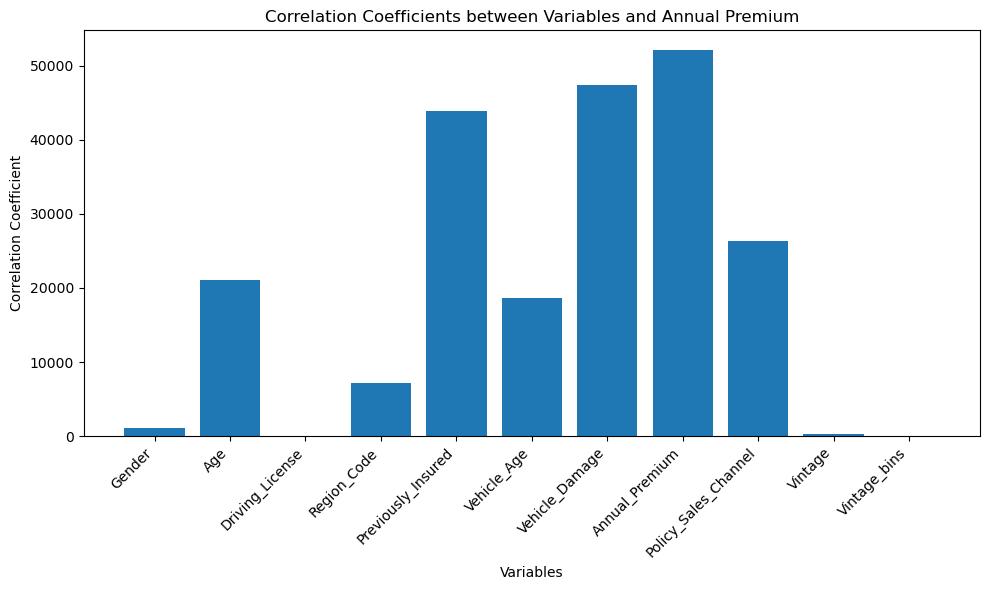

In [46]:
columns = df.columns.tolist()
columns.remove('id')
columns.remove('Response')

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Vintage'], df['Response']).to_numpy()

contingency_table

chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)

final_chi_corr = {}

for feature in columns:
    df_cleaned = df.dropna(subset=[feature])
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['Response']).to_numpy()
    chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    final_chi_corr[feature] = chi2_statistic

print(final_chi_corr)

variables = list(final_chi_corr.keys())
correlation_values = list(final_chi_corr.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(variables, correlation_values)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Variables and Annual Premium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

{'Gender': 49055.29765084963, 'Age': 3331537.245887607, 'Driving_License': 64920.60761418061, 'Region_Code': 2327829.151892192, 'Previously_Insured': 58065.66536475701, 'Vehicle_Age': 131831.1638891689, 'Vehicle_Damage': 57272.85908584878, 'Policy_Sales_Channel': 7008005.923974703, 'Vintage': 14084548.325689284, 'Response': 52187.14970917016, 'Vintage_bins': 243910.04381908843}


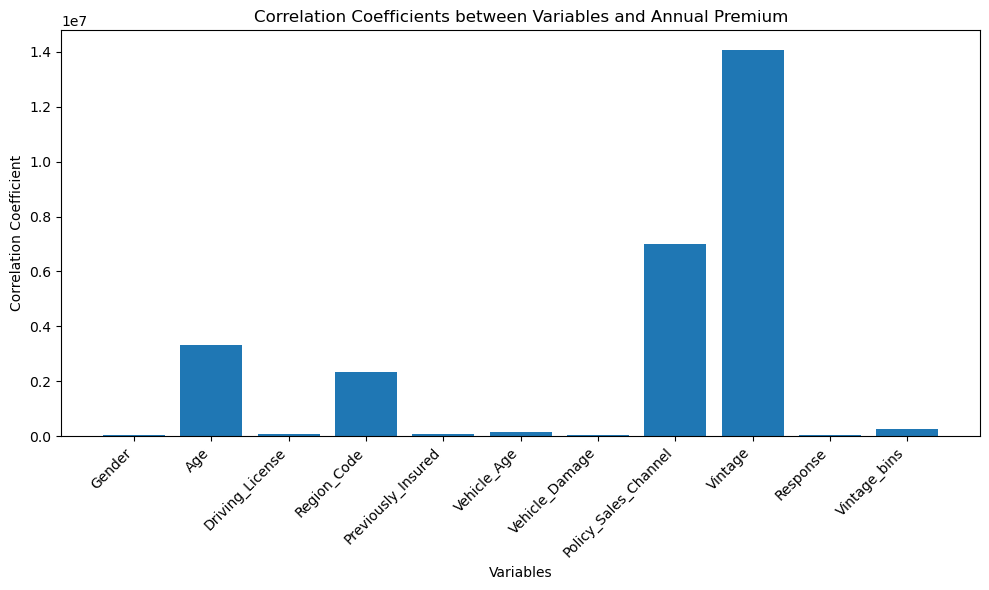

In [47]:
columns = df.columns.tolist()
columns.remove('id')
columns.remove('Annual_Premium')

columns
from scipy.stats import chi2_contingency

final_chi_corr = {}

for feature in columns:
    df_cleaned = df.dropna(subset=[feature])
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['Annual_Premium']).to_numpy()
    chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    final_chi_corr[feature] = chi2_statistic

print(final_chi_corr)

variables = list(final_chi_corr.keys())
correlation_values = list(final_chi_corr.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(variables, correlation_values)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Variables and Annual Premium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

<Axes: >

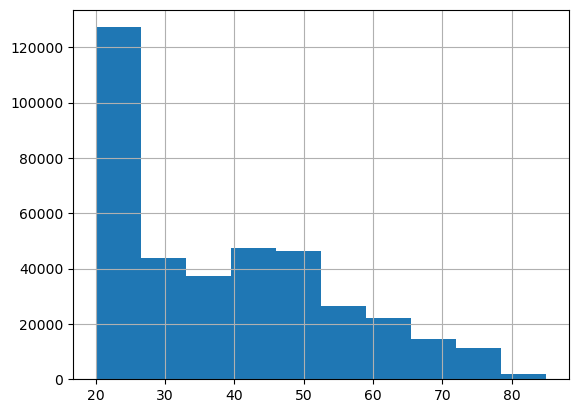

In [48]:
df['Age'].hist()

In [49]:
df = df.drop(columns=['Gender','Driving_License','Vintage','Vintage_bins'])
df = df.drop(columns=['Region_Code'])

In [50]:
from sklearn import preprocessing 
le_ag = preprocessing.LabelEncoder() 

df['age_group'] = age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

df['age_group'] = le_ag.fit_transform(df['age_group'])

df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [51]:
df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [52]:
df.isnull().sum()

id                         0
Age                     2519
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
age_group                  0
dtype: int64

In [53]:
print(df['Age'].value_counts())
print(df[df['Vehicle_Damage']==1.0]['Age'].value_counts())
df[df['Vehicle_Damage']==0.0]['Age'].value_counts()

Age
24.0    25792
23.0    24098
22.0    20847
25.0    20502
21.0    16338
        ...  
81.0       56
82.0       29
83.0       22
84.0       11
85.0       11
Name: count, Length: 66, dtype: int64
Age
21.0    7261
22.0    7083
23.0    6914
24.0    6606
43.0    5782
        ... 
81.0      30
82.0      13
83.0      10
85.0       7
84.0       2
Name: count, Length: 66, dtype: int64


Age
24.0    19103
23.0    17127
25.0    15698
22.0    13698
26.0    10519
        ...  
81.0       26
82.0       16
83.0       12
84.0        9
85.0        4
Name: count, Length: 66, dtype: int64

In [54]:
def fill_age_full(row):
    if pd.isnull(row['Age']):
        if row['Vehicle_Damage'] == 1.0:
            return 21.0
        elif row['Vehicle_Damage'] == 0.0:
            return 24.0
        else:
            return 24.0
    else:
        return row['Age']

df['Age'] = df.apply(fill_age_full,axis=1)

df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [55]:
df.isnull().sum()

id                         0
Age                        0
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
age_group                  0
dtype: int64

In [56]:
df['Previously_Insured'].value_counts()

Previously_Insured
0.0    204755
1.0    173146
Name: count, dtype: int64

In [57]:
pd.crosstab(index=[df['Response'], df['Vehicle_Damage']], columns=df['Previously_Insured'])

def fill_previously_insured_full(row):
    if pd.isnull(row['Previously_Insured']):
        if row['Response'] == 0:
            if row['Vehicle_Damage'] == 0.0:
                return 1.0
            elif row['Vehicle_Damage'] == 1.0:
                return 0.0
            else:
                return 0.0
        else:
            return 0.0
    else:
        return row['Previously_Insured']
    

df['Previously_Insured'] = df.apply(fill_previously_insured_full,axis=1)
        
        


In [58]:
df.isna().sum()

id                         0
Age                        0
Previously_Insured         0
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
age_group                  0
dtype: int64

In [59]:
df['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

In [60]:
print(minn:=df['Annual_Premium'].min(),maxx:=df['Annual_Premium'].max())

df[df['Annual_Premium']==minn]['Policy_Sales_Channel'].value_counts()

df[df['Annual_Premium']==maxx]['Policy_Sales_Channel'].value_counts()


2630.0 540165.0


Policy_Sales_Channel
156.0    1
26.0     1
42.0     1
124.0    1
Name: count, dtype: int64

In [61]:
print(df['Policy_Sales_Channel'].unique())
df['Policy_Sales_Channel'].fillna(0.0,inplace=True)

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  nan  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83.  19. 136.  24.  18.  56.
  48. 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140.
 107. 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92.
 111. 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94.
 132.  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95.
 123.  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.
  58.  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.
  79. 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144.
 143.  41.]


In [62]:
df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [63]:
df[df['Vehicle_Damage'] == 1.0]['Response'].value_counts()

df[df['Vehicle_Damage'] == 1.0]['age_group'].value_counts()

age_group
2    51774
0    45244
1    33476
3    30357
4    17138
5     8958
7     3739
6       62
Name: count, dtype: int64

In [64]:
df[df['Vehicle_Damage'] == 0.0]['Response'].value_counts()

df[df['Vehicle_Damage'] == 0.0]['age_group'].value_counts()

age_group
0    108551
2     23449
1     21179
3     14512
4     10403
5      6146
7      2778
6        67
Name: count, dtype: int64

In [65]:
def fill_damage_full(row):
    if pd.isnull(row['Vehicle_Damage']):
        if row['Response'] == 1.0:
            return 1.0
        else:
            return 1.0
    else:
        return row['Vehicle_Damage']
    

df['Vehicle_Damage'] = df.apply(fill_damage_full,axis=1)

df.isna().sum()

id                         0
Age                        0
Previously_Insured         0
Vehicle_Age             3458
Vehicle_Damage             0
Annual_Premium          3166
Policy_Sales_Channel       0
Response                   0
age_group                  0
dtype: int64

In [66]:
df['Vehicle_Age'].fillna(df['Vehicle_Age'].mode()[0],inplace=True)

In [67]:
df.isna().sum()

id                         0
Age                        0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium          3166
Policy_Sales_Channel       0
Response                   0
age_group                  0
dtype: int64

In [68]:
from sklearn.linear_model import LinearRegression
df_non_nan = df.dropna()

X = df_non_nan.drop('Annual_Premium',axis=1)
X = X.drop('id',axis=1)
Y = df_non_nan['Annual_Premium']

categorical_cols = X.columns

print(categorical_cols)

Index(['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Response', 'age_group'],
      dtype='object')


In [69]:
lr = LinearRegression()
lr.fit(X, Y)

lr.coef_

array([  54.54693052, 1698.96905075, 1578.10375289,  884.54916264,
        -38.21091873, 1064.82273242, -106.98943922])

In [70]:
round(lr.predict([[24.0, 1.0, 1.0, 0.0, 152.0, 0.0, 0.0]])[0],0)

c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28119.0

In [71]:
def fill_annual_premium_full(row):
    col_vals = []
    if pd.isnull(row['Annual_Premium']):
        for col in categorical_cols:
            col_vals.append(row[col])
        premium = round(lr.predict([col_vals])[0],0)
        return premium
    else:
        return row['Annual_Premium']

df['Annual_Premium'] = df.apply(fill_annual_premium_full,axis=1)


c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does 

In [72]:
df.isna().sum()

id                      0
Age                     0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Response                0
age_group               0
dtype: int64

### Model training and prediction

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [195]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



X = df.drop('Response', axis=1)
X = X.drop('id',axis=1)
y = df['Response']

scaler = StandardScaler()
X['Annual_Premium']= scaler.fit_transform(X[['Annual_Premium']])
X['Age'] = scaler.fit_transform(X[['Age']])
X['Policy_Sales_Channel'] = scaler.fit_transform(X[['Policy_Sales_Channel']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# undersampler = RandomUnderSampler(random_state=42)
# X_train, y_train= undersampler.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)




In [196]:
X_train

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,age_group
0,-1.013776,1.0,2.0,0.0,0.439485,0.741689,0
1,-0.497835,0.0,1.0,0.0,-0.163053,0.192749,1
2,-1.013776,0.0,2.0,0.0,-0.276889,0.741689,0
3,2.146363,0.0,1.0,1.0,0.824265,0.430623,5
4,0.598539,0.0,1.0,1.0,0.470277,-1.563860,2
...,...,...,...,...,...,...,...
535087,2.200453,0.0,1.0,1.0,-0.294017,-1.563860,5
535088,2.000444,0.0,1.0,1.0,-0.304201,0.229345,4
535089,0.921003,0.0,1.0,1.0,-1.629450,0.229345,3
535090,0.147091,0.0,1.0,1.0,0.003500,-1.489312,2


In [187]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [198]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

Accuracy: 0.7753929311747264
Precision: 0.28425096030729835
Recall: 0.5449887928274095
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     66853
           1       0.28      0.54      0.37      9369

    accuracy                           0.78     76222
   macro avg       0.61      0.68      0.62     76222
weighted avg       0.85      0.78      0.80     76222



In [199]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

Accuracy: 0.6405106137335678
Precision: 0.25121412803532006
Recall: 0.9717152310812254
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66853
           1       0.25      0.97      0.40      9369

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [200]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

Accuracy: 0.7737005064154706
Precision: 0.2841095890410959
Recall: 0.553420856014516
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     66853
           1       0.28      0.55      0.38      9369

    accuracy                           0.77     76222
   macro avg       0.61      0.68      0.62     76222
weighted avg       0.85      0.77      0.80     76222



In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

Accuracy: 0.8192123009104982
Precision: 0.2953132250580046
Recall: 0.3396306969794001
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     66853
           1       0.30      0.34      0.32      9369

    accuracy                           0.82     76222
   macro avg       0.60      0.61      0.61     76222
weighted avg       0.83      0.82      0.82     76222



In [202]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'num_class': len(set(y)),       
    'eval_metric': 'merror',        
    'seed': 42                      
}

num_rounds = 100  
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

Accuracy: 0.8759675684185668
Precision: 0.5905511811023622
Recall: 0.023627008295705135
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.59      0.02      0.05      9523

    accuracy                           0.88     76222
   macro avg       0.73      0.51      0.49     76222
weighted avg       0.84      0.88      0.82     76222



In [203]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=1000,  # Number of boosting iterations
                                    learning_rate=0.1,  # Learning rate
                                    depth=6,  # Depth of trees
                                    loss_function='Logloss',  # Loss function
                                    eval_metric='Accuracy',  # Evaluation metric
                                    random_seed=42)  # Random seed for reproducibility


catboost_model.fit(X_train, y_train, verbose=100)  # Set verbose to see training progress

y_pred = catboost_model.predict(X_test)

print(classification_report(y_test, y_pred))

0:	learn: 0.8780302	total: 221ms	remaining: 3m 40s
100:	learn: 0.8788108	total: 7.63s	remaining: 1m 7s
200:	learn: 0.8792864	total: 13.7s	remaining: 54.6s
300:	learn: 0.8795718	total: 18.9s	remaining: 44s
400:	learn: 0.8800047	total: 24.1s	remaining: 36s
500:	learn: 0.8802901	total: 29.6s	remaining: 29.5s
600:	learn: 0.8806377	total: 34.8s	remaining: 23.1s
700:	learn: 0.8809133	total: 40s	remaining: 17.1s
800:	learn: 0.8811035	total: 45.5s	remaining: 11.3s
900:	learn: 0.8813232	total: 50.7s	remaining: 5.57s
999:	learn: 0.8815988	total: 55.8s	remaining: 0us
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.58      0.03      0.06      9523

    accuracy                           0.88     76222
   macro avg       0.73      0.51      0.50     76222
weighted avg       0.84      0.88      0.82     76222

